In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [233]:
df=pd.read_csv('center_sternum.txt',sep='\t')

log_freq=df['Log Freq'][0]
a=df['Log Freq']!=df['Log Freq'][0]

if sum(a)==0:
    df['Time']=np.arange(0,len(df['qi']))/df['Log Freq'][0]
    log_freq=df['Log Freq'][0]
df

,Log Mode,Log Freq,Timestamp,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ,qw,qi,qj,qk,Time
0,5,200,1576222772,947.086,435.662,70.638,-6.824428,-14.244280,1.404580,-454,-490,-178,0.792622,0.254952,-0.553850,-0.000031,0.000
1,5,200,1576222772,969.168,387.777,88.877,6.183206,-12.290080,-7.969466,-454,-490,-177,0.736461,0.275124,-0.617969,0.006806,0.005
2,5,200,1576222772,989.603,380.335,78.751,11.709920,-4.961832,-7.450382,-454,-490,-177,0.729465,0.275246,-0.626118,0.009827,0.010
3,5,200,1576222772,954.894,418.033,88.328,17.877860,2.519084,-5.984733,-454,-492,-176,0.723413,0.277200,-0.632221,0.011383,0.015
4,5,200,1576222772,972.096,427.732,99.857,25.221370,5.404580,4.015267,-454,-492,-176,0.721948,0.280007,-0.632679,0.010193,0.020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16501,5,200,1576222847,958.493,291.092,-54.290,1.664122,2.305344,-0.671756,-494,-449,-126,0.650810,0.379162,-0.636402,0.166356,82.505
16502,5,200,1576222847,954.650,288.042,-49.654,1.480916,2.488550,-0.702290,-494,-450,-125,0.650239,0.379803,-0.636708,0.165960,82.510
16503,5,200,1576222847,967.338,290.482,-63.867,1.114504,3.374046,-0.900763,-494,-450,-125,0.649365,0.380627,-0.637227,0.165502,82.515
16504,5,200,1576222847,965.630,300.852,-56.242,0.702290,3.664122,-1.587786,-495,-448,-124,0.648973,0.381329,-0.637348,0.164953,82.520


In [234]:
Df=df[['Time','AccX','AccY','AccZ','GyroX','GyroY','GyroZ']]
#limits=[18,80.5]    #set 1
#limits=[4,68]       #set 3
limits=[6,71]       #set 0
 
a=Df['Time']>limits[0]
b=Df['Time']<limits[1]
mask=np.where(a&b)

Df=Df[['Time','AccX','AccY','AccZ','GyroX','GyroY','GyroZ']].iloc[mask]
Df

,Time,AccX,AccY,AccZ,GyroX,GyroY,GyroZ
1201,6.005,-40.443,114.009,-942.511,-1.511450,4.900764,-0.778626
1202,6.010,-40.504,108.336,-953.857,-2.076336,4.916030,-0.885496
1203,6.015,-33.062,107.848,-958.310,-1.435115,4.763359,-0.870229
1204,6.020,-42.639,104.127,-952.637,-0.824427,4.442748,-1.053435
1205,6.025,-36.112,107.848,-958.432,-0.885496,3.694657,-0.931298
...,...,...,...,...,...,...,...
14195,70.975,-33.672,128.283,-938.851,-0.259542,5.984733,-0.580153
14196,70.980,-33.794,123.769,-939.522,0.717557,5.847328,-0.137405
14197,70.985,-32.269,125.538,-953.003,0.488550,4.748092,-0.320611
14198,70.990,-38.369,121.146,-956.297,-0.488550,4.885496,-0.824427


<IPython.core.display.Javascript object>


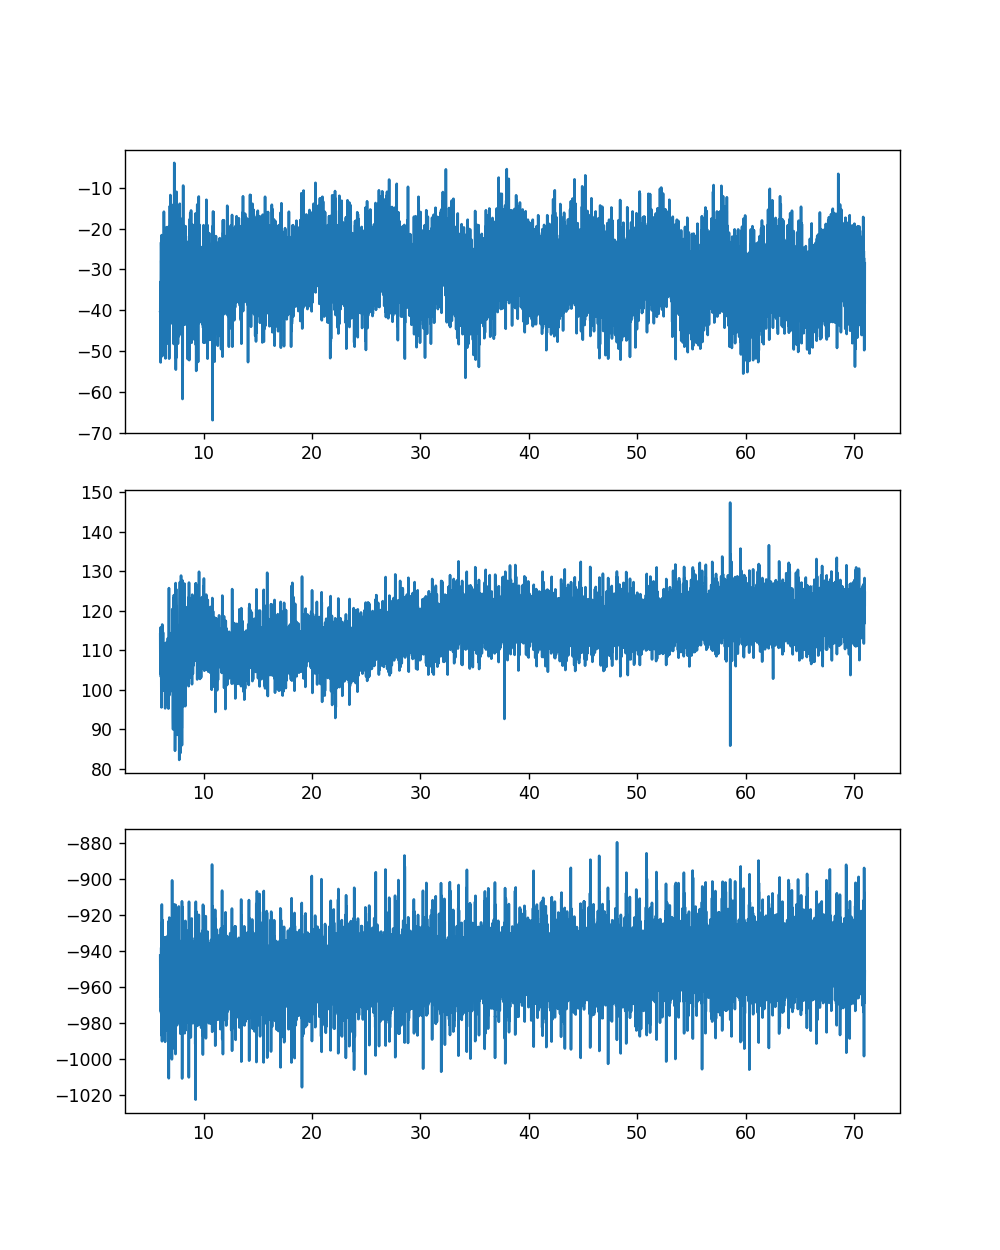

In [235]:
fig,ax = plt.subplots(nrows=3, ncols=1, figsize=(8,10))
ax[0].plot(Df['Time'],Df['AccX'])
ax[1].plot(Df['Time'],Df['AccY'])
ax[2].plot(Df['Time'],Df['AccZ'])


<IPython.core.display.Javascript object>


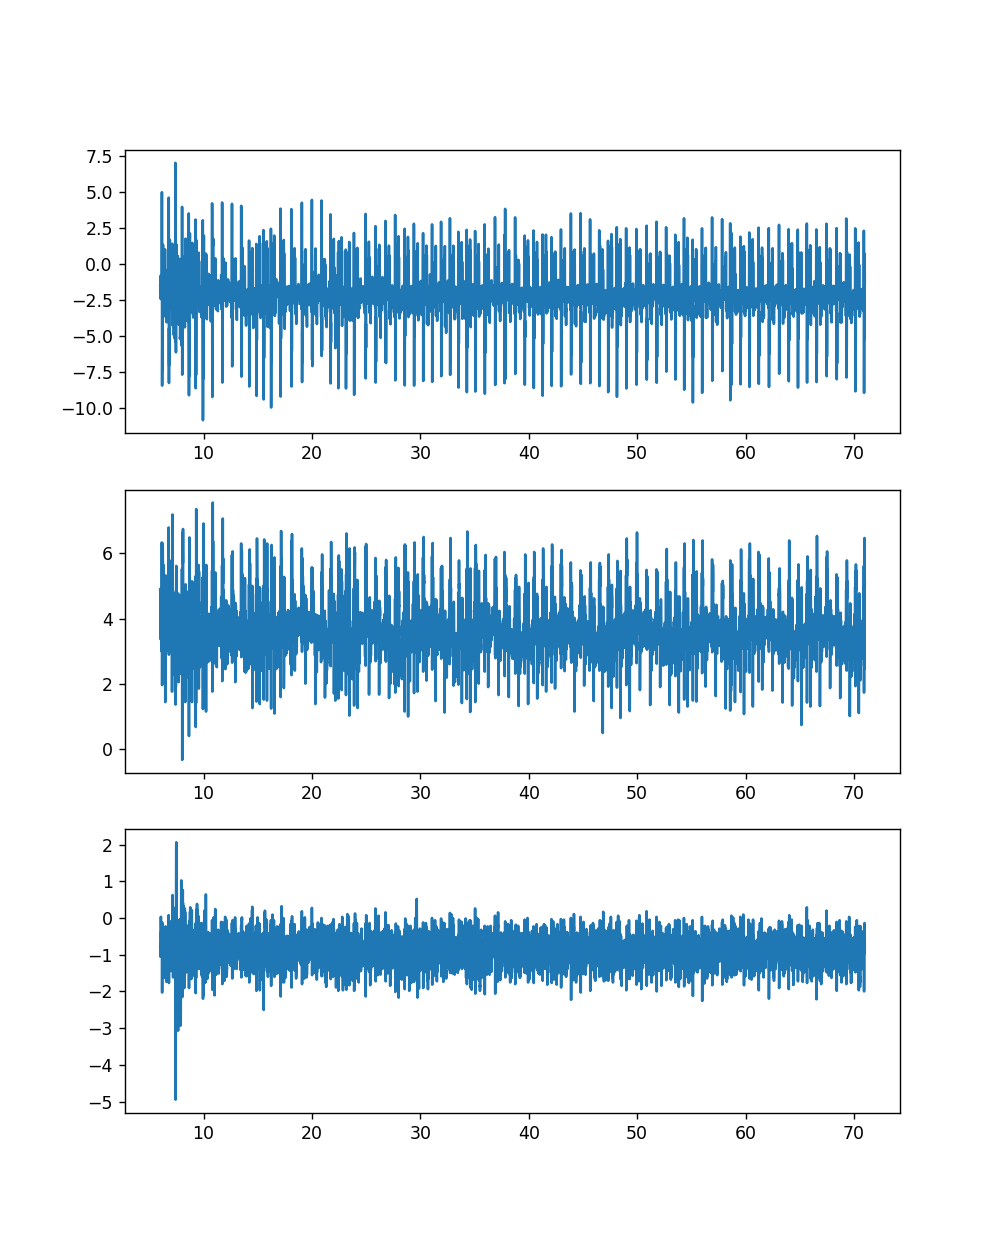

In [236]:
fig,ax = plt.subplots(nrows=3, ncols=1, figsize=(8,10))
ax[0].plot(Df['Time'],Df['GyroX'])
ax[1].plot(Df['Time'],Df['GyroY'])
ax[2].plot(Df['Time'],Df['GyroZ'])


<IPython.core.display.Javascript object>


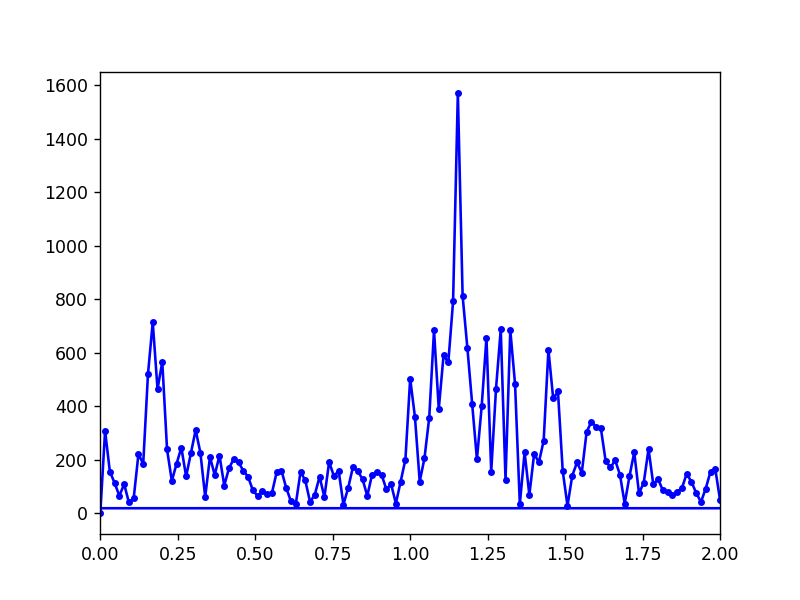

(-0.001, 2.0)

In [237]:
import numpy as np
gyroxfreq=np.fft.fft(Df['GyroY']-np.mean(Df['GyroY']))
freq=np.fft.fftfreq(d=1/log_freq, n=len(gyroxfreq))

%matplotlib notebook
plt.plot(freq,np.abs(gyroxfreq),'b-o', markersize=3)
plt.xlim(-0.001,2)

## wavelet filtering

<IPython.core.display.Javascript object>


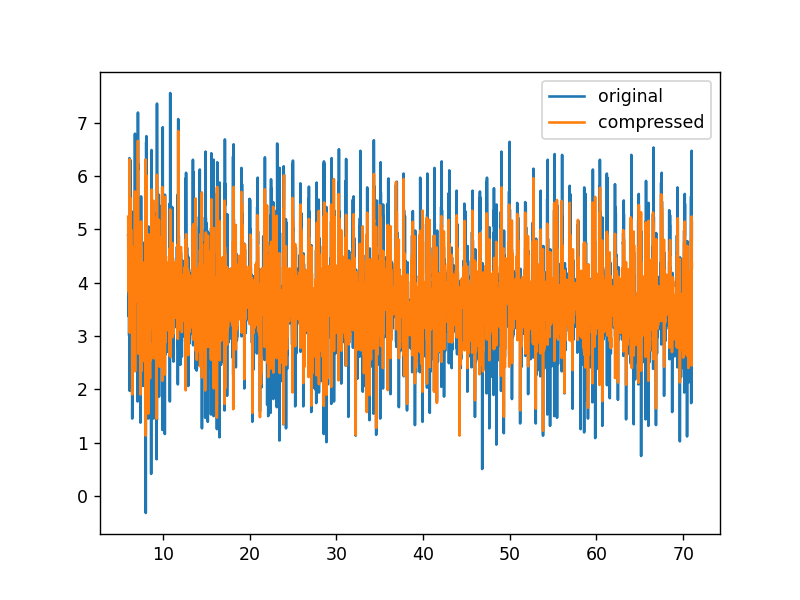

In [272]:
import pywt
coeff=pywt.wavedec(Df['GyroY'],'db1',mode='periodic')
coeff=np.array(coeff)
#compression
div=100
for j in range(len(coeff)):
    mean=np.mean(coeff[j])
    coeff[j][coeff[j]<mean/div]=coeff[j][coeff[j]<mean/div]+(mean-coeff[j][coeff[j]<mean/div])
    
coeff=list(coeff)
y=pywt.waverec(coeff,'db1',mode='periodic')
coeff
plt.figure()
plt.plot(Df['Time'],Df['GyroY'], label='original')
plt.plot(Df['Time'],y[:-1],label='compressed')
plt.legend()
# plt.figure()
# #plt.plot(Df['Time'],Df['GyroY'], label='original')
# plt.plot(Df['Time'],y[:-1],label='compressed')
# plt.legend()

In [314]:
#denoising
coeff=pywt.wavedec(Df['GyroY'],'db1',mode='periodic')
coeff=np.array(coeff)


coeff=list(coeff)
y=pywt.waverec(coeff,'db1',mode='periodic')
#coeff, len(coeff)
# plt.figure()
# plt.plot(Df['Time'],Df['GyroY'], label='original')
# plt.plot(Df['Time'],y[:-1],label='compressed')
# plt.legend()

<IPython.core.display.Javascript object>


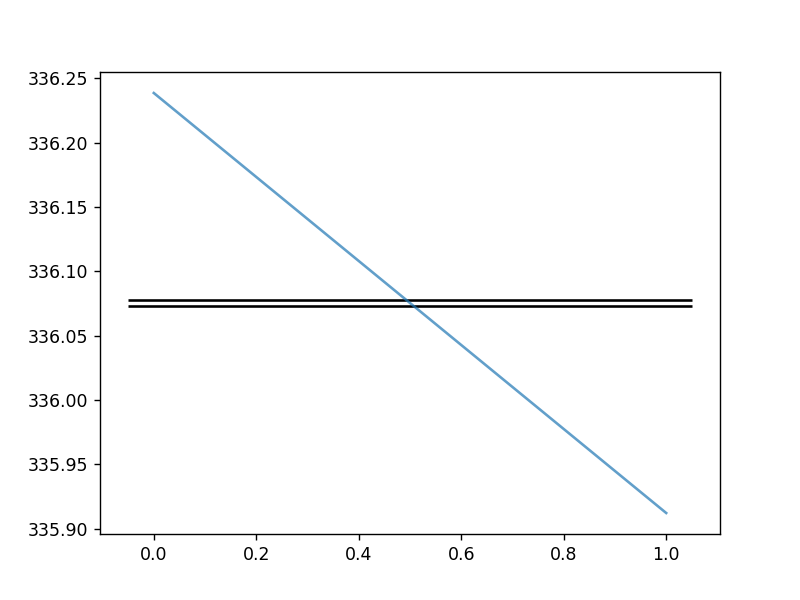

<IPython.core.display.Javascript object>


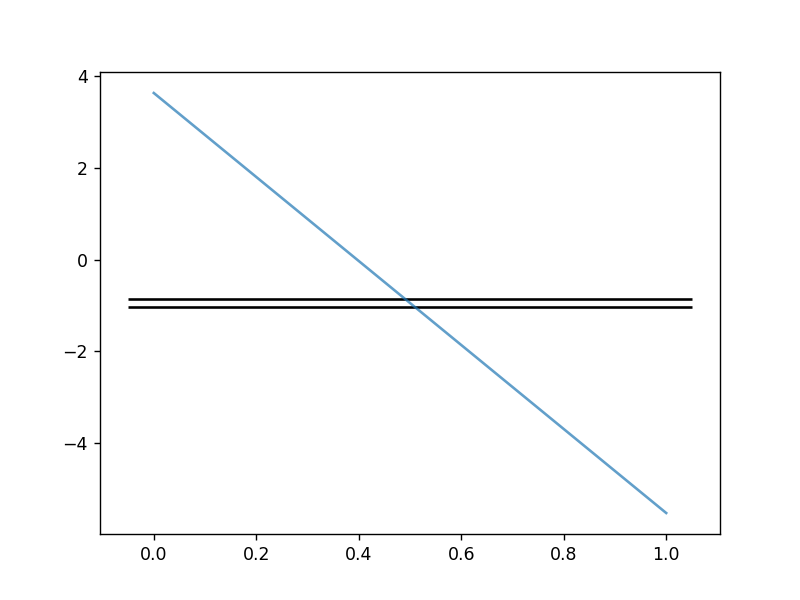

<IPython.core.display.Javascript object>


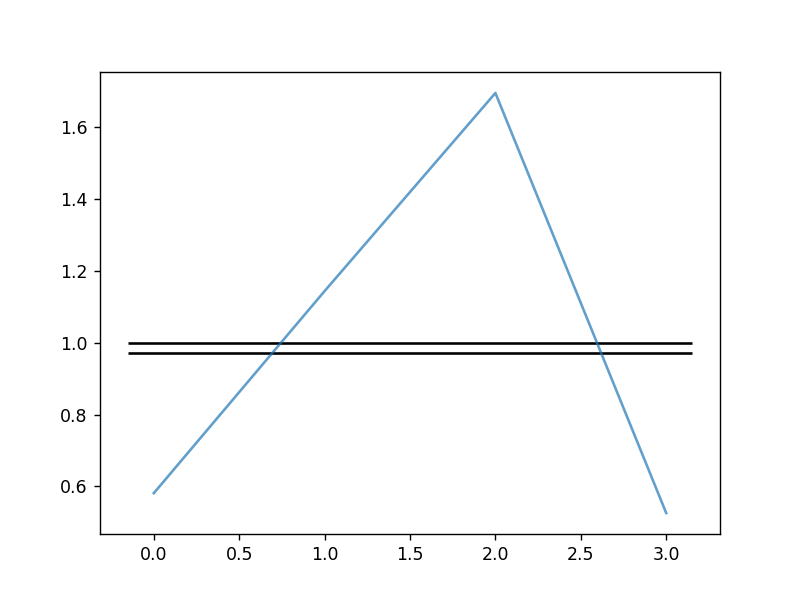

<IPython.core.display.Javascript object>


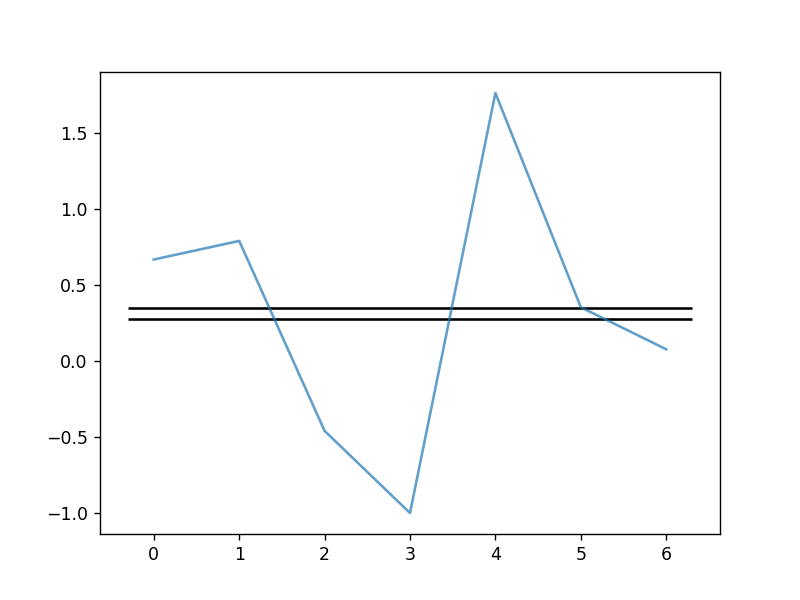

<IPython.core.display.Javascript object>


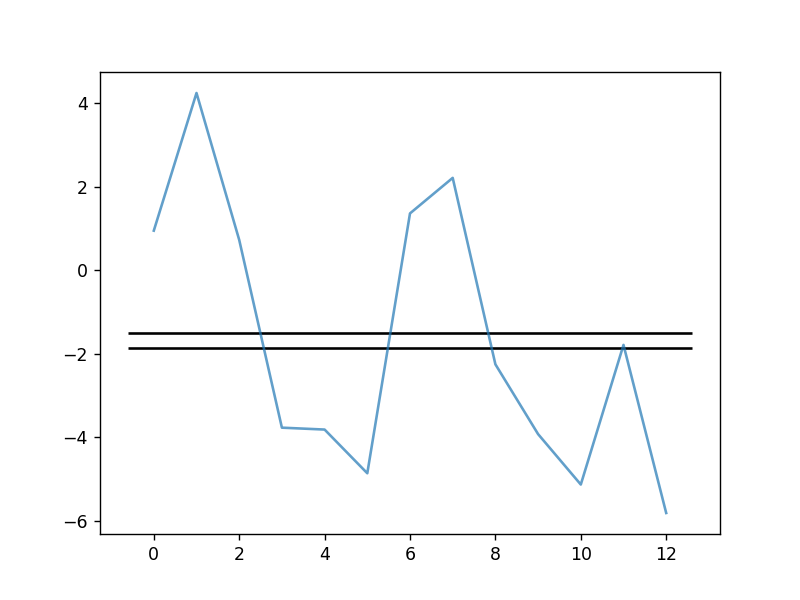

<IPython.core.display.Javascript object>


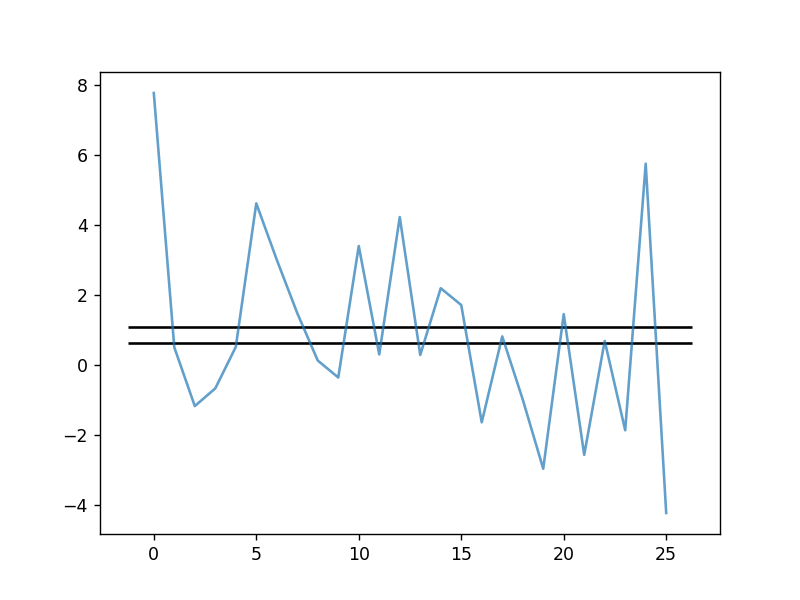

<IPython.core.display.Javascript object>


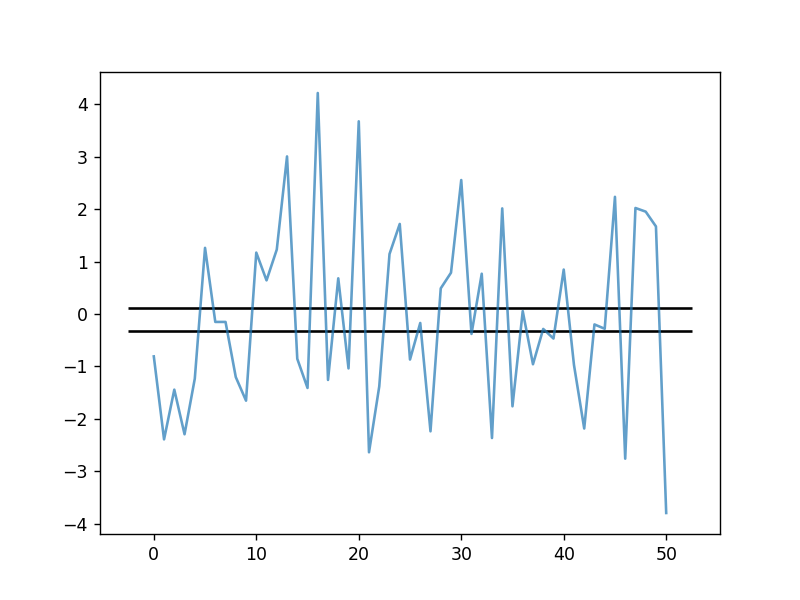

<IPython.core.display.Javascript object>


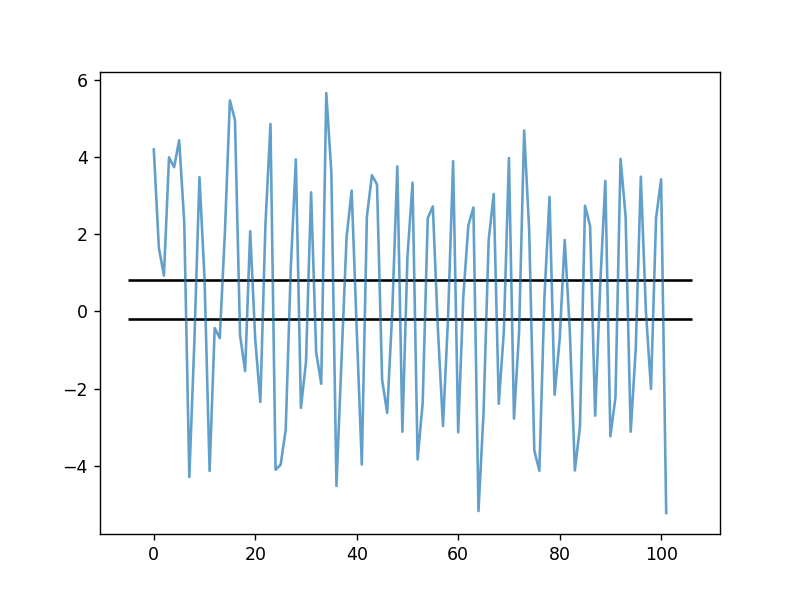

<IPython.core.display.Javascript object>


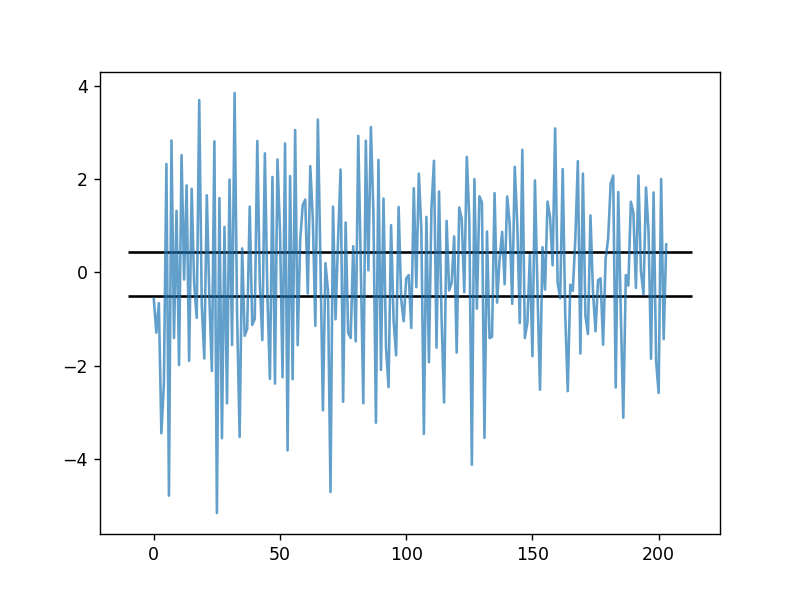

<IPython.core.display.Javascript object>


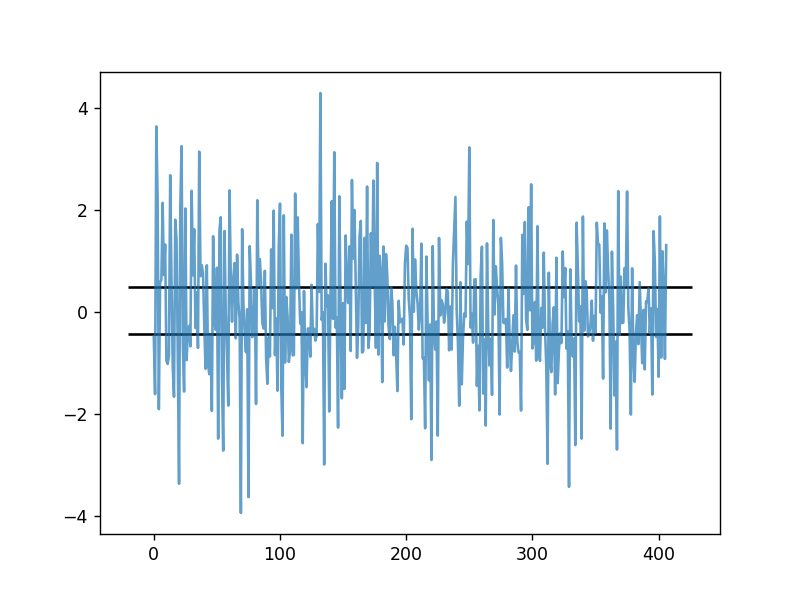

<IPython.core.display.Javascript object>


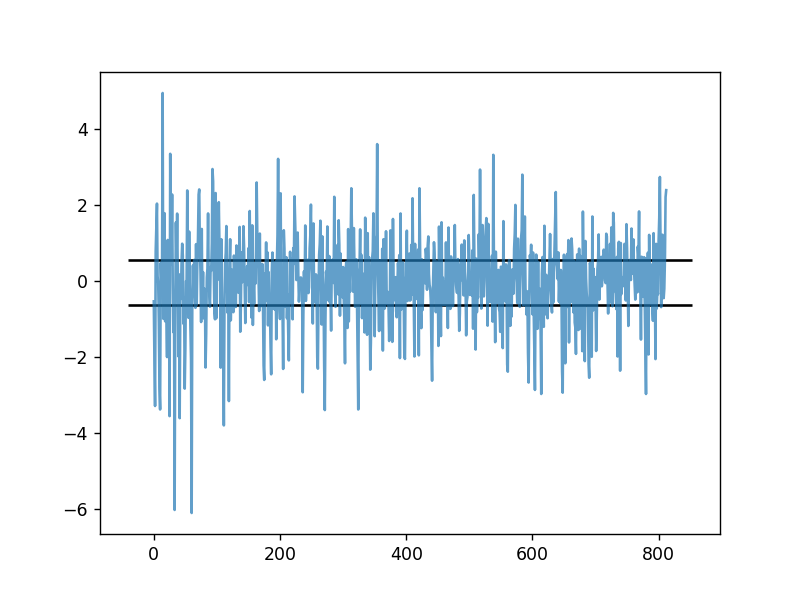

<IPython.core.display.Javascript object>


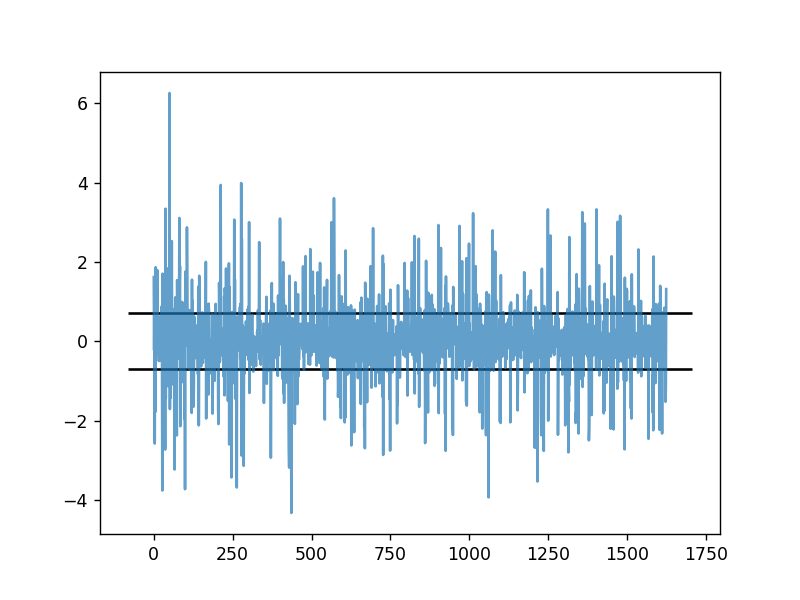

<IPython.core.display.Javascript object>


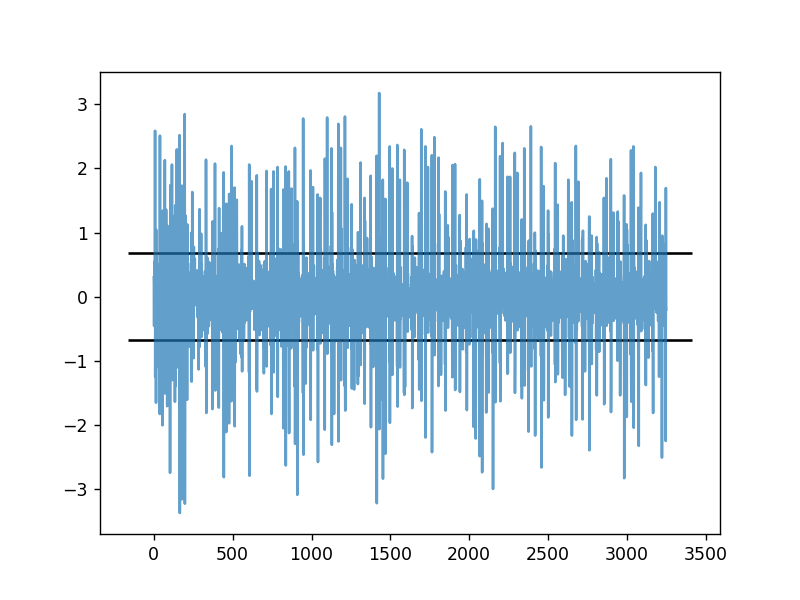

<IPython.core.display.Javascript object>


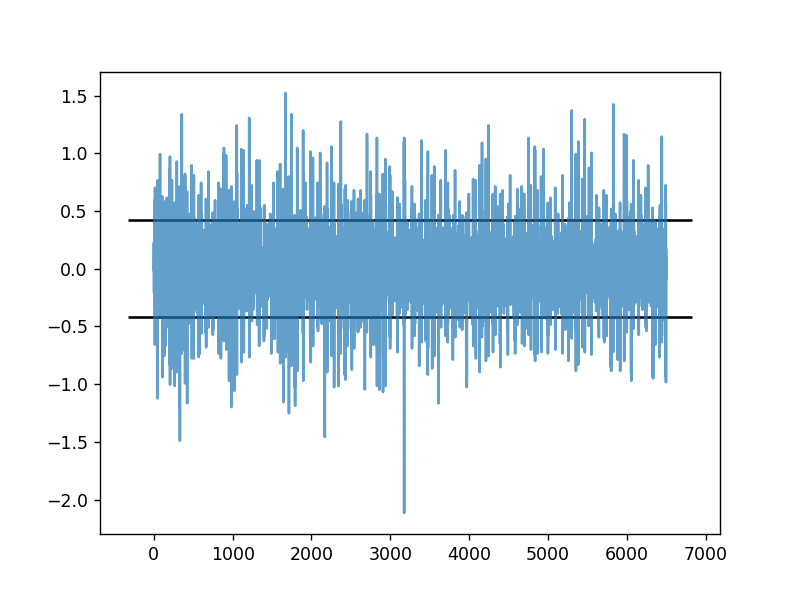

In [315]:
a=[0.7**(i) for i in np.arange(len(coeff)-1,-1,-1)]
coeff=np.array(coeff)
for idx in range(len(coeff)):
    plt.figure()
    plt.plot(coeff[idx],alpha=0.7)
    lim=plt.xlim()
    threshold_high=np.mean(coeff[idx])+1.5*a[idx]*np.std(coeff[idx])
    threshold_low=np.mean(coeff[idx])-1.5*a[idx]*np.std(coeff[idx])
    plt.hlines(threshold_high,lim[0],lim[1])
    plt.hlines(threshold_low,lim[0],lim[1])
    coeff[idx][np.bitwise_and(coeff[idx]<threshold_high,coeff[idx]>threshold_low)]=0


<IPython.core.display.Javascript object>


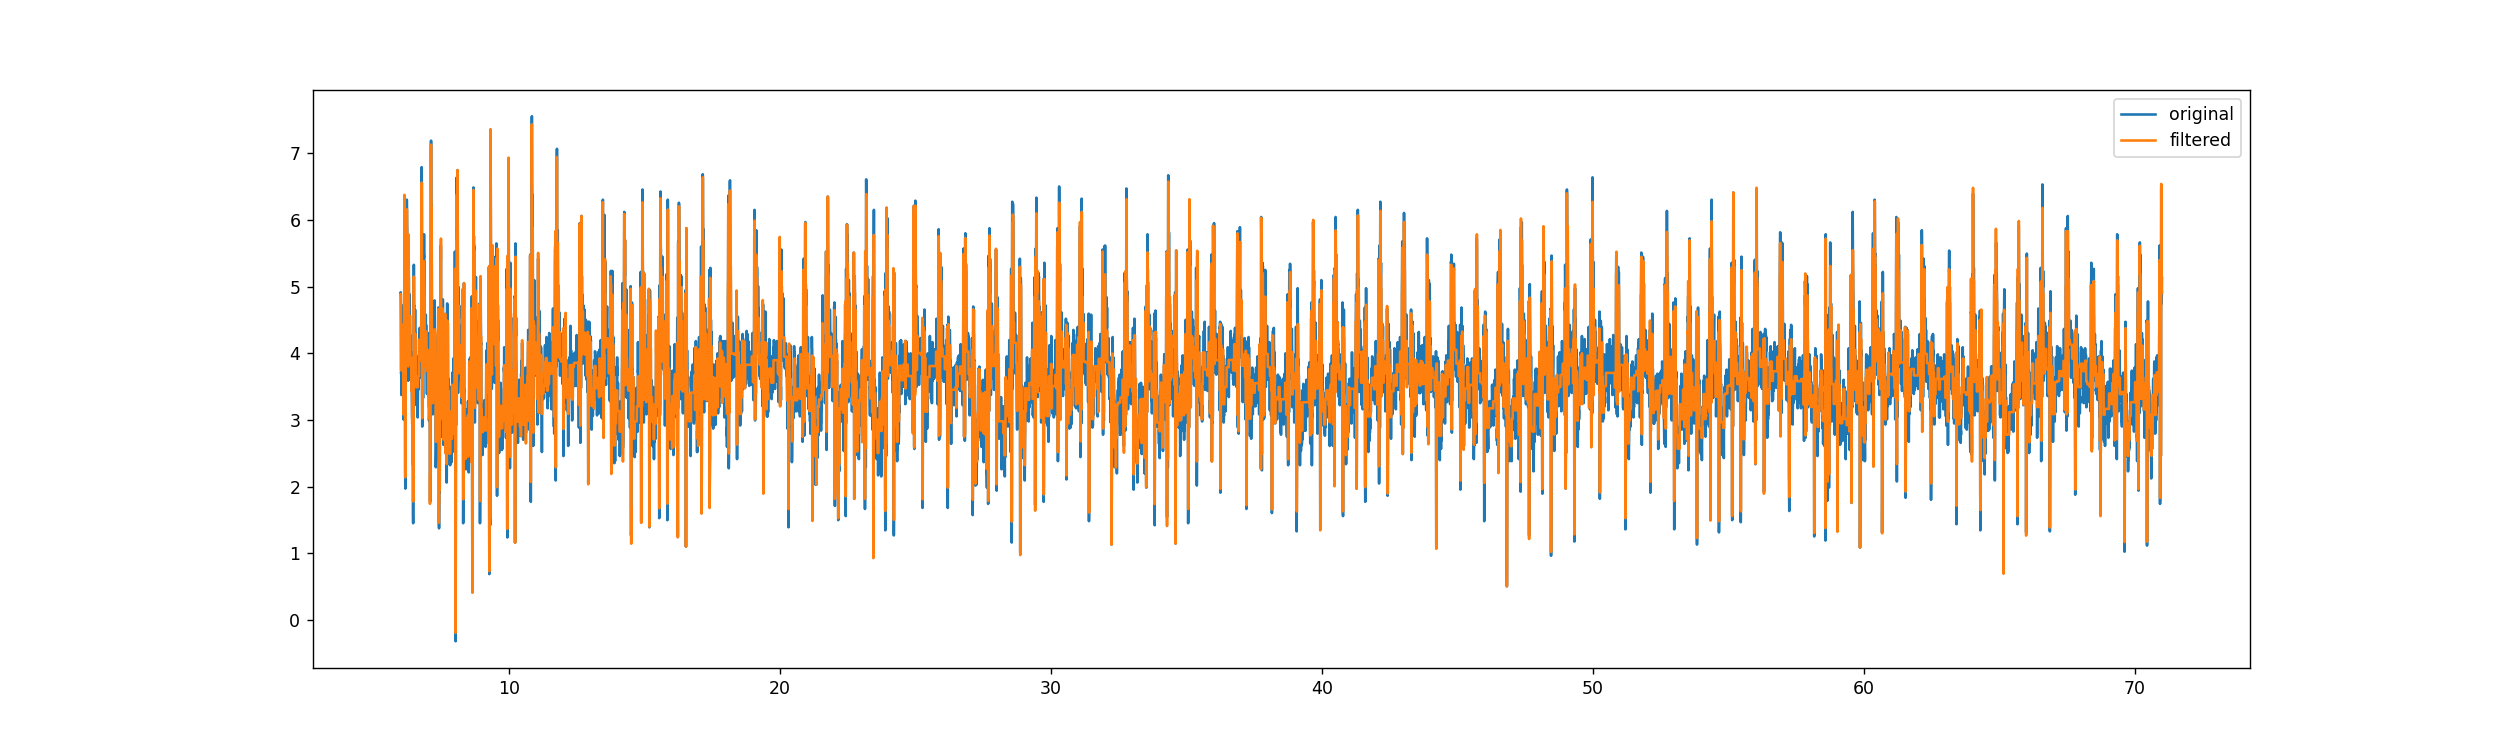

In [318]:
y1=pywt.waverec(list(coeff),'db1',mode='periodic')
#coeff, len(coeff)
plt.figure(figsize=(20,6))
plt.plot(Df['Time'],Df['GyroY'], label='original')
plt.plot(Df['Time'],y1[:-1],label='filtered')
plt.legend()

<IPython.core.display.Javascript object>


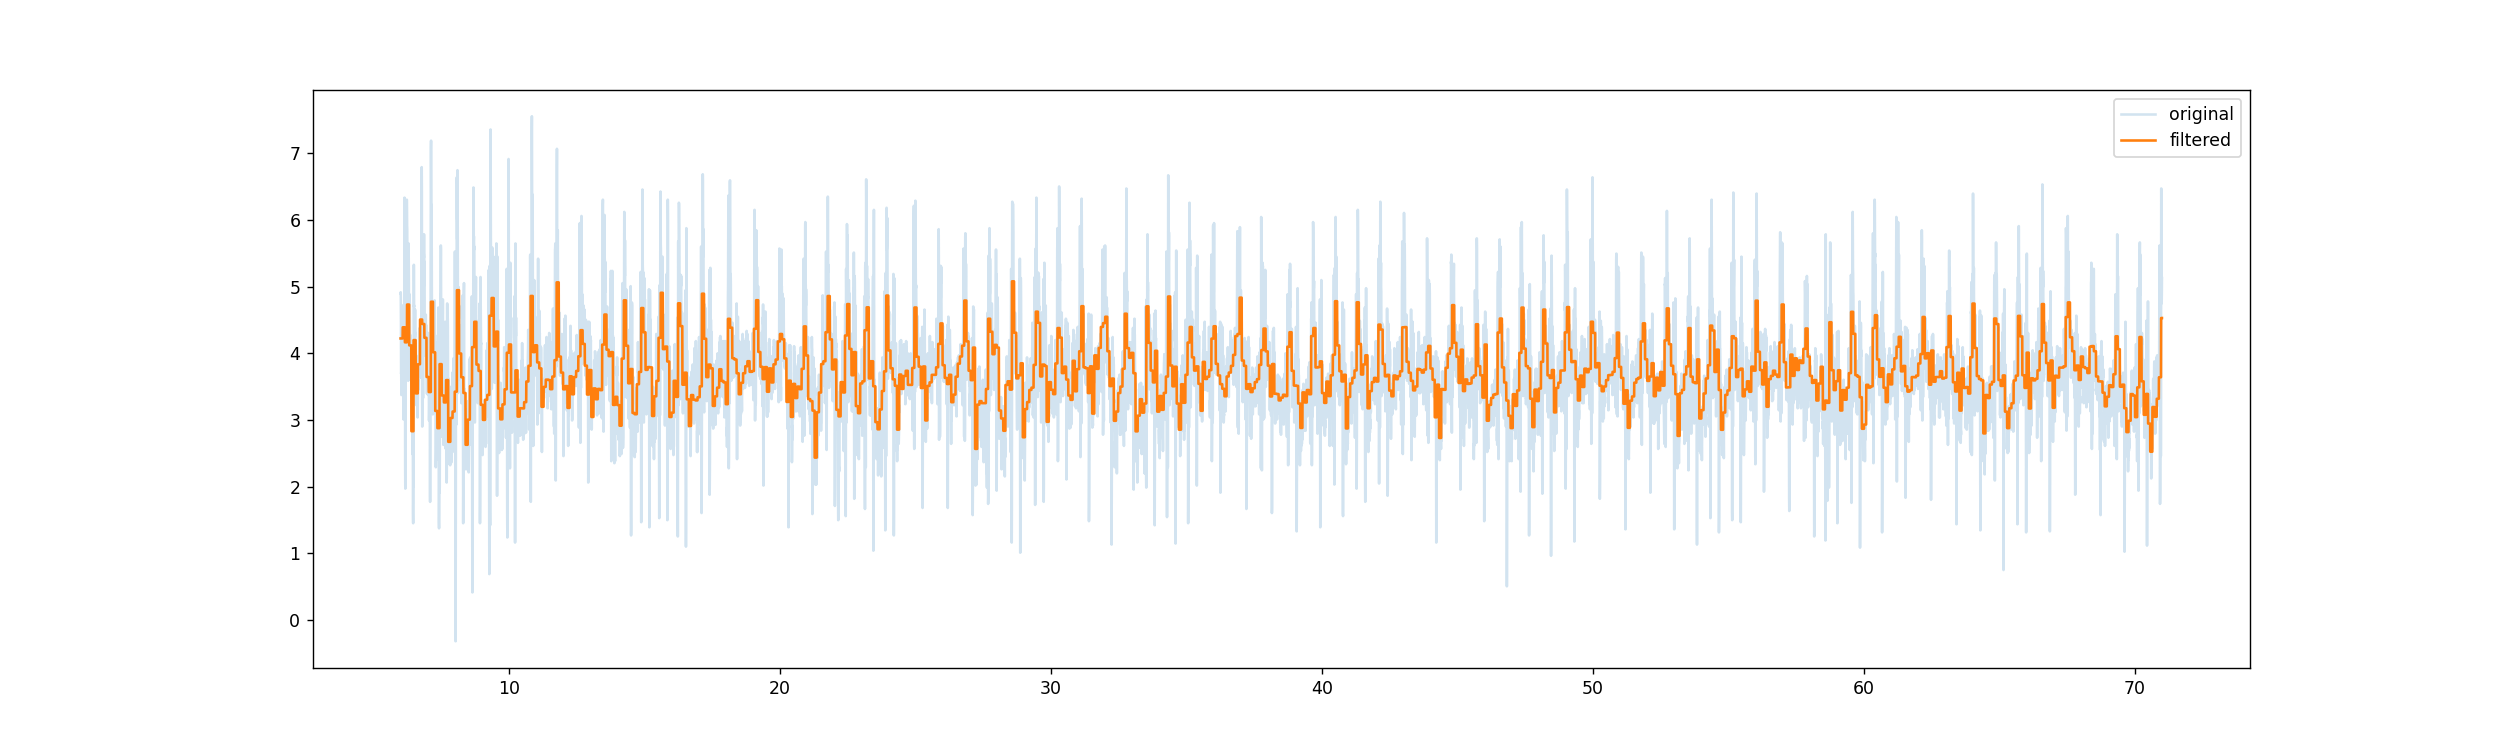

In [313]:
coeff=pywt.wavedec(Df['GyroY'],'db1',mode='periodic')

coeff=np.array(coeff)
for i in np.arange(10,len(coeff)):
    coeff[i]=np.zeros(len(coeff[i]))
    
for j in np.arange(1,5):
    coeff[j]=np.zeros(len(coeff[j])) 

y2=pywt.waverec(list(coeff),'db1',mode='periodic')
#coeff, len(coeff)
plt.figure(figsize=(20,6))
plt.plot(Df['Time'],Df['GyroY'], label='original', alpha=0.2)
plt.plot(Df['Time'],y2[:-1],label='filtered')
plt.legend()